# Problem 1


## Data Exploration and Preprocessing

Shape of X: (9834, 400)
Shape of y: (9834,)


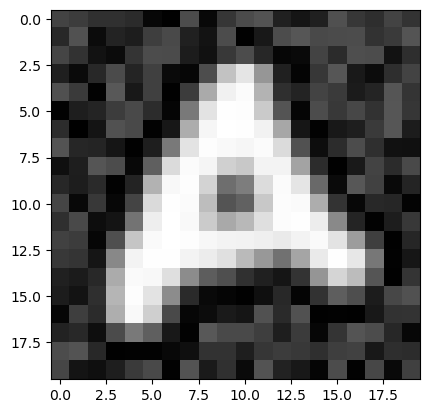

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#load Dataset
data = np.load("dataset.npz")

#Extracting images and labels 
X = data["X"]   #Image data
y = data["y"]   #Corresponding labels

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

#Normalize the pixel values to be in range [0,1]
X_normalized = X / 255.0

# Function to visualize an image
def visualize_image(image_data):
    plt.imshow(image_data.reshape(20, 20), cmap="gray", vmin=0, vmax=255)

# Visualize the first image
visualize_image(X[0])

# np.savez("preprocessed_dataset.npz", X = X_normalized, y = y) To svae preprocessed dataset

Class distribution: {0: 627, 1: 230, 2: 525, 3: 950, 4: 500, 5: 695, 6: 912, 7: 605, 8: 427, 9: 205, 10: 825, 11: 525, 12: 950, 13: 909, 14: 74, 15: 450, 16: 425}


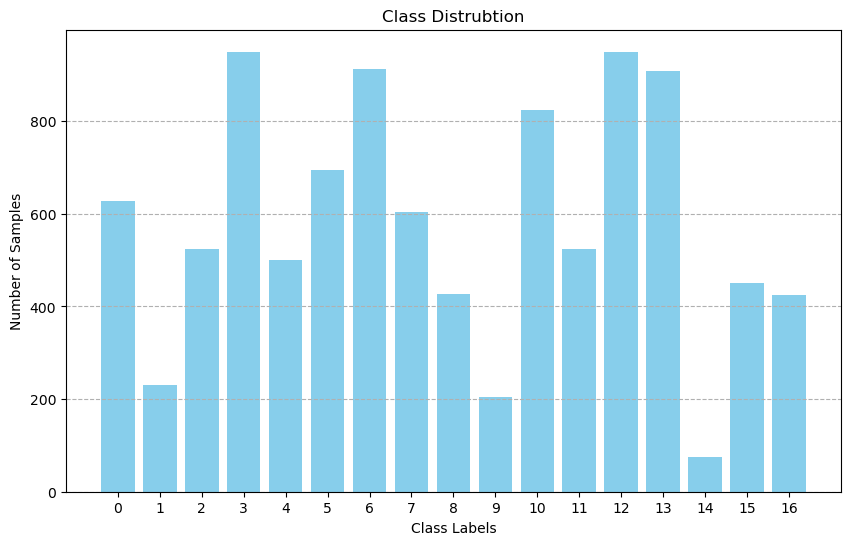

In [3]:
#Count the number of occurrences for each label
unique, counts = np.unique(y, return_counts=True)
class_distribution = {int(label): int(count) for label,count in zip(unique,counts)}
#Print the class distribution
print("Class distribution:", class_distribution)

labels = list(class_distribution.keys())
values = list(class_distribution.values())

plt.figure(figsize=(10,6))
plt.bar(labels, values, color="skyblue")
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.title("Class Distrubtion")
plt.xticks(labels)
plt.grid(axis="y", linestyle="--")

plt.show()

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample, shuffle

#Load the preprocessed dataset
data = np.load("preprocessed_dataset.npz")
X = data["X"]   #Images
y = data["y"]   #Labels

#Split the dataset into training and test, with 80/20 ratio between training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=19)


### Oversampling of Minority Class 14

In [21]:
#Allocate the target size to a appropriate size regarding the dataset
target_size = 400

#Seperate the majority and minority class
X_minority_label14 = X_train[y_train == 14]
y_minority_label14 = y_train[y_train == 14]

X_minority_label9 = X_train[y_train == 9]
y_minority_label9 = y_train[y_train == 9]

X_minority_label1 = X_train[y_train == 1]
y_minority_label1 = y_train[y_train == 1]

#Oversample the minority class with the use of resample from sklearn
X_minority_oversampled14, y_minority_oversampled14 = resample(X_minority_label14, y_minority_label14, replace=True, n_samples=target_size, random_state=19)
X_minority_oversampled9, y_minority_oversampled9 = resample(X_minority_label9, y_minority_label9, replace=True, n_samples=target_size, random_state=19)
X_minority_oversampled1, y_minority_oversampled1 = resample(X_minority_label1, y_minority_label1, replace=True, n_samples=target_size, random_state=19)

#Combine the oversampled minority classes with original trainingset using concatenate from NumPy
X_train_balanced = np.concatenate((X_train, X_minority_oversampled14, X_minority_oversampled9, X_minority_oversampled1), axis=0)
y_train_balanced = np.concatenate((y_train, y_minority_oversampled14, y_minority_oversampled9, y_minority_oversampled1), axis=0)

#Shuffle the balanced dataset with shuffle from NumPy
X_train_balanced, y_train_balanced = shuffle(X_train_balanced, y_train_balanced, random_state=19)

Class distribution: {0: 506, 1: 589, 2: 422, 3: 758, 4: 414, 5: 552, 6: 734, 7: 463, 8: 341, 9: 570, 10: 678, 11: 418, 12: 752, 13: 717, 14: 460, 15: 362, 16: 331}


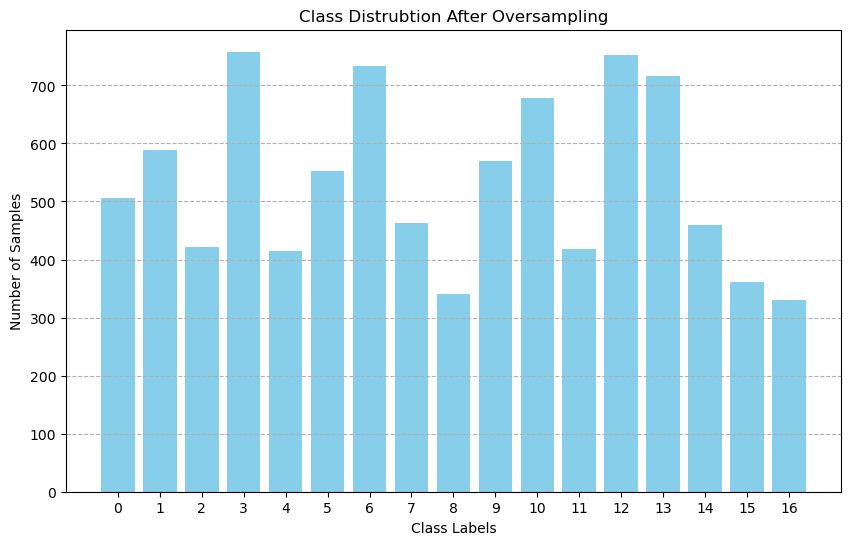

In [6]:
#Count the number of occurrences for each label
unique, counts = np.unique(y_train_balanced, return_counts=True)
class_distribution_balanced = {int(label): int(count) for label,count in zip(unique,counts)}
#Print the class distribution
print("Class distribution:", class_distribution_balanced)

labels_balanced = list(class_distribution_balanced.keys())
values_balanced = list(class_distribution_balanced.values())

plt.figure(figsize=(10,6))
plt.bar(labels_balanced, values_balanced, color="skyblue")
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.title("Class Distrubtion After Oversampling")
plt.xticks(labels)
plt.grid(axis="y", linestyle="--")

plt.show()

## Hyperparameter Tuning

### Logistic Regression

In [7]:
#Tuning Logistic Regression hyperparameter C using the validation set
best_accuracy = 0
C_values = [0.01, 0.1, 1, 10, 100]
max_iter = [500,1000,1500]
log_reg_accuracies = []
for C in C_values:
    for iteration in max_iter:
        log_reg = LogisticRegression(C=C, max_iter=iteration, random_state=19)
        log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring="f1_macro")
        accuracy_log_reg = log_reg_scores.mean()
        log_reg_accuracies.append(accuracy_log_reg)
        print(f"Logistic Regression with regulation strength={C} and max iteration={iteration}. Cross-Validation Accuracy = {accuracy_log_reg:4f}")

        if accuracy_log_reg > best_accuracy:
            best_C = C
            best_accuracy = accuracy_log_reg
            best_max_iteration = iteration
print(f"The best hyperparamter is: regulation strenght={best_C} and max iteration={best_max_iteration}, with an accuracy of: {best_accuracy}")

Logistic Regression with regulation strength=0.01 and max iteration=500. Cross-Validation Accuracy = 0.743851
Logistic Regression with regulation strength=0.01 and max iteration=1000. Cross-Validation Accuracy = 0.743851
Logistic Regression with regulation strength=0.01 and max iteration=1500. Cross-Validation Accuracy = 0.743851
Logistic Regression with regulation strength=0.1 and max iteration=500. Cross-Validation Accuracy = 0.815601
Logistic Regression with regulation strength=0.1 and max iteration=1000. Cross-Validation Accuracy = 0.815601
Logistic Regression with regulation strength=0.1 and max iteration=1500. Cross-Validation Accuracy = 0.815601
Logistic Regression with regulation strength=1 and max iteration=500. Cross-Validation Accuracy = 0.813808
Logistic Regression with regulation strength=1 and max iteration=1000. Cross-Validation Accuracy = 0.813808
Logistic Regression with regulation strength=1 and max iteration=1500. Cross-Validation Accuracy = 0.813808
Logistic Regress

### Random Forest


In [8]:
#Tuning k-Nearest Neighbor hyperparameter K using validation set
best_accuracy = 0
n_estimators_values = [50,100,200]
max_depth_values = [10,20,25]
min_samples_leafs = [1,3,5]
results = []
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_leafs in min_samples_leafs:    
            rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_leafs, random_state=19)
            rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="f1_macro")
            accuracy_rf = rf_scores.mean()
            results.append({"n_estimators":n_estimators, "max_depth":max_depth, "accuracy":accuracy_rf})
            print(f"Random Forest with n_estimator={n_estimators}, max depth={max_depth} and minimum leafs={min_leafs}. Cross-Validation Accuracy = {accuracy_rf:4f}")

            if accuracy_rf > best_accuracy:
                best_n_estimators = n_estimators
                best_accuracy = accuracy_rf
                best_max_depth = max_depth
                best_min_samples_leafs = min_leafs

print(f"The best hyperparameter is: n_estimators={best_n_estimators}, minimum samples per leaf={best_min_samples_leafs} and max depth={max_depth}. with an accuracy of: {best_accuracy}")


Random Forest with n_estimator=50, max depth=10 and minimum leafs=1. Cross-Validation Accuracy = 0.776700
Random Forest with n_estimator=50, max depth=10 and minimum leafs=3. Cross-Validation Accuracy = 0.776602
Random Forest with n_estimator=50, max depth=10 and minimum leafs=5. Cross-Validation Accuracy = 0.780463
Random Forest with n_estimator=50, max depth=20 and minimum leafs=1. Cross-Validation Accuracy = 0.802339
Random Forest with n_estimator=50, max depth=20 and minimum leafs=3. Cross-Validation Accuracy = 0.798020
Random Forest with n_estimator=50, max depth=20 and minimum leafs=5. Cross-Validation Accuracy = 0.798538
Random Forest with n_estimator=50, max depth=25 and minimum leafs=1. Cross-Validation Accuracy = 0.801749
Random Forest with n_estimator=50, max depth=25 and minimum leafs=3. Cross-Validation Accuracy = 0.795229
Random Forest with n_estimator=50, max depth=25 and minimum leafs=5. Cross-Validation Accuracy = 0.798634
Random Forest with n_estimator=100, max depth=

## Training and Testing on The Final Model

In [24]:
#Train the final model on the balanced trainset with oversampling of minority class
final_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_leaf=best_min_samples_leafs,random_state=19)
final_model.fit(X_train_balanced, y_train_balanced)

#Test the model with the Test set and print the results
y_pred_test = final_model.predict(X_test)
print("Final Random Forest Classification Report:")
print(classification_report(y_test, y_pred_test))

Final Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       121
           1       0.85      0.98      0.91        41
           2       0.92      0.82      0.87       103
           3       0.86      0.95      0.90       192
           4       0.89      0.86      0.88        86
           5       0.94      0.82      0.87       143
           6       0.92      0.92      0.92       178
           7       0.88      0.95      0.92       142
           8       0.92      0.76      0.83        86
           9       0.89      0.71      0.79        35
          10       0.83      0.95      0.89       147
          11       0.82      0.62      0.71       107
          12       0.87      0.96      0.91       198
          13       0.83      0.83      0.83       192
          14       1.00      0.21      0.35        14
          15       0.81      0.84      0.83        88
          16       1.00      1.00     

# Problem 2

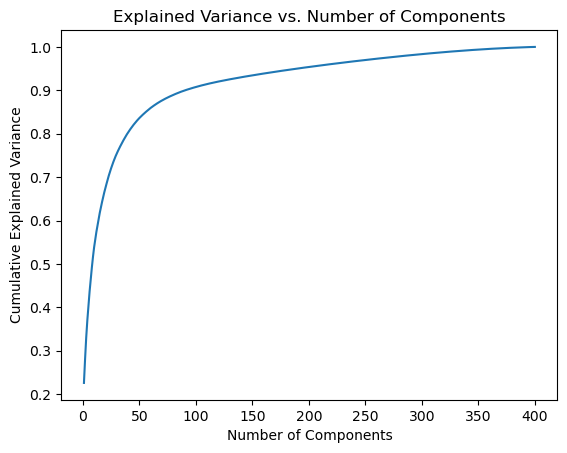

In [34]:
from sklearn.decomposition import PCA
pca = PCA()

#Fit PCA on the balanced training data
pca.fit(X_train_balanced)

#Cumulative explained Variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()



In [36]:
n_components = 100

#Initialize PCA with numver of components
pca = PCA(n_components=n_components)

#Fit PCA on training data
pca.fit(X_train_balanced)

#Transform the training data
X_train_pca = pca.transform(X_train_balanced)

#Transform the test data using same PCA
X_test_pca = pca.transform(X_test)

In [37]:
#Initialize and train my final model
pca_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_leaf=best_min_samples_leafs, random_state=19)
pca_model.fit(X_train_pca, y_train_balanced)

#Make predictions and evaluate final model and print the results
y_pred_pca = pca_model.predict(X_test_pca)
print("PCA Applied Random Forest Classification Report:")
print(classification_report(y_test, y_pred_pca))

PCA Applied Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       121
           1       0.80      0.98      0.88        41
           2       0.92      0.78      0.84       103
           3       0.78      0.96      0.86       192
           4       0.88      0.80      0.84        86
           5       0.85      0.78      0.81       143
           6       0.88      0.93      0.90       178
           7       0.90      0.93      0.91       142
           8       0.90      0.66      0.77        86
           9       0.89      0.69      0.77        35
          10       0.77      0.96      0.86       147
          11       0.84      0.50      0.63       107
          12       0.82      0.97      0.89       198
          13       0.85      0.85      0.85       192
          14       1.00      0.07      0.13        14
          15       0.85      0.80      0.82        88
          16       1.00      1.0

# Problem 3


In [139]:
#Load the corrupt dataset
corrupt_data = np.load('corrupt_dataset.npz')
X_corrupt = corrupt_data["X"]

print("Shape of corrupt_data:", X_corrupt.shape)

#Flatten each image back to 1d array for PCA
X_corrupt_flat = X_corrupt.reshape((-1,400))

#Apply PCA transformation using the trained PCA model from Problem 2
X_corrupt_pca = pca.transform(X_corrupt_flat)

#Predict probablities using previous trained classifier
probs = pca_model.predict_proba(X_corrupt_pca)

#Here we extract all the images that were predicted with a confidence less than the threshold
threshold = 0.14
corrupt_indices = np.where(np.max(probs, axis=1) < threshold)[0]    #where is an Inbuilt NumPy function that find the indices of elements that are True. I.e lower than the threshold

count = 0
for corrupt_idx in corrupt_indices:
    count += 1
print(count)


Shape of corrupt_data: (935, 400)
52
